### 1. Loading necessary dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.linear_model import LogisticRegression
from keras.models import Sequential
from tensorflow.keras.layers import InputLayer
from keras.layers import Dense, Flatten
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import keras
from keras.datasets import cifar10

from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout

from keras.regularizers import l1, l2
from tensorflow.keras.layers import LeakyReLU


### 2. Loading CIFAR-10 dataset

In [ ]:
# define num_class
num_classes = 10

# load dataset keras will download cifar-10 datset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()  

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


170498071/170498071 [==============================] - 13s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


### 3. Data preprocessing

The reason we need to convert class vectors to binary class matrices when using categorical crossentropy loss function is because the loss function requires the ground truth labels to be in a one-hot encoding format.

In other words, the categorical crossentropy loss function compares the predicted probabilities for each class with a one-hot encoding of the true class labels. The one-hot encoding is a binary vector where each element corresponds to a possible class and has a value of either 0 or 1, indicating whether the sample belongs to that class or not.

In [ ]:
# Converting class vectors to binary class matrices.
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

Normalizing pixel values between 0 and 1 is a common preprocessing step in deep learning, especially for image classification tasks. This is because it can help improve the performance and stability of the model by ensuring that the input data has a similar scale and range.

In [ ]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

### 4. Exploratory Data Analysis

In [ ]:
# Y-Train and Y-Test dataset
y_train.shape,y_test.shape

((50000, 1), (10000, 1))

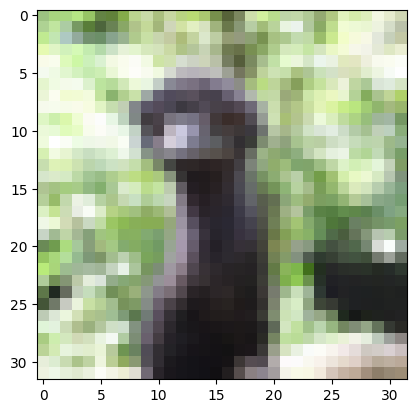

In [ ]:
# Let's try to plot the image from the pixel values of x_train dataset.
plt.imshow(x_train[55])

Finding the total number of images for each class:

In [ ]:
# set names to the classes 
names = ['Airplane','Automobile','Bird','Cat','Deer',
               'Dog','Frog','Horse','Ship','Truck']

# see the number of images in each class
for i in range(10):
    print(f'Number of samples for {names[i]} class are : {np.count_nonzero(x_train[i]) + np.count_nonzero(x_test[i])}')

Number of samples for Airplane class are : 6137
Number of samples for Automobile class are : 6108
Number of samples for Bird class are : 6144
Number of samples for Cat class are : 6144
Number of samples for Deer class are : 6133
Number of samples for Dog class are : 6142
Number of samples for Frog class are : 6139
Number of samples for Horse class are : 6144
Number of samples for Ship class are : 6144
Number of samples for Truck class are : 6144


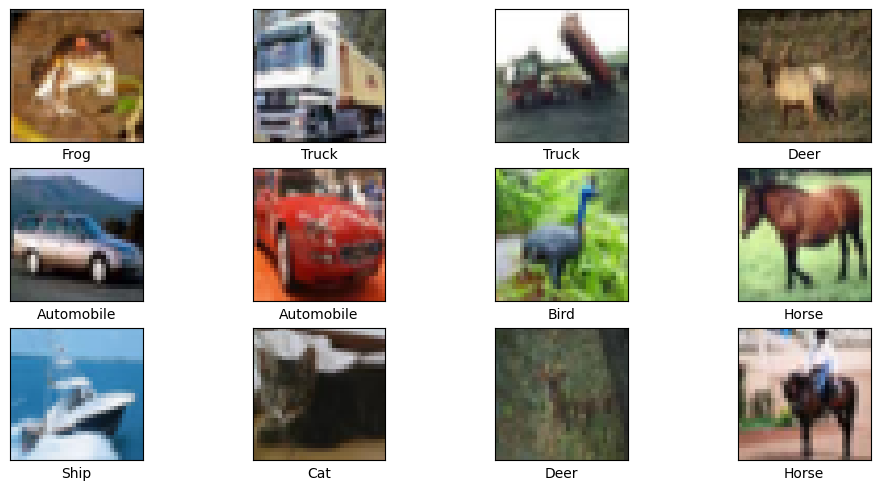

In [ ]:
# Some photos with its labels
plt.figure(figsize=(12,10))
for i in range(12):
    plt.subplot(5,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
    plt.xlabel(names[y_train[i][0]])

To solve the classification problem of CIFAR-10 dataset, there are several methods that we can use, such as:

1. Logistic Regression
2. Support Vector Machine (SVM) w/ kernel
3. SVM w/o kernel
4. Deep Neural Network (DNN) w/ Convolution Layer (CNN)
5. DNN w/o convolution layer

For this project, I have used two methods.

a] DNN without convolution layer.
b] DNN with convolution layer.

For both of these methods, we will develop multiple models with different layer structures and different hyperparameters.

To compare which model is better, we will plot accuracy and loss plots.

### 5. Building Models

### Method 1 - Deep Neural Network Without Convolution layer

Deep neural networks (DNNs) without convolution layers can be used for image classification tasks, but their performance may not be as good as those with convolutional layers. Convolutional layers are specifically designed to extract spatial features from images, which is crucial for image classification.

However, there may be some scenarios where using DNNs without convolution layers could be useful. For example, if the images being classified have very low resolution or are very small, the use of convolutional layers may not be as effective. In these cases, a DNN without convolutional layers may be a more appropriate choice.

Additionally, using DNNs without convolution layers could be beneficial if the dataset being used for classification has very limited training data. DNNs without convolutional layers tend to have fewer parameters than their convolutional counterparts, making them less prone to overfitting when training data is limited.

Overall, while using DNNs without convolution layers for image classification tasks may be feasible in some scenarios, it is important to consider the specific characteristics of the dataset and the images being classified before deciding on the best approach.

#### Model_1
1 input flatten layer, 3 hidden layers and 1 output layer using softmax activation function.

In [ ]:
# Designing the layer architecture of the DNN model
LAYERS = [
          tf.keras.layers.Flatten(input_shape=[32, 32,3], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(200, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer3"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer"),
]

In [ ]:
# creating model object using the sequential Api of keras.
model_DNN1 = tf.keras.models.Sequential(LAYERS)

In [ ]:
# The summary function helps to visualize the output shape for each layer and also the total number of parameters to be trained (weights + bias)
model_DNN1.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 3072)              0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               921900    
                                                                 
 hiddenLayer2 (Dense)        (None, 200)               60200     
                                                                 
 hiddenLayer3 (Dense)        (None, 100)               20100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 1,003,210
Trainable params: 1,003,210
Non-trainable params: 0
_________________________________________________________________


We use accuracy, precision, and recall as metrics after each epoch in deep neural networks (DNNs) to evaluate the performance of the model and monitor its progress during training.

Accuracy measures the proportion of correctly classified examples out of the total number of examples. It gives an overall picture of how well the model is performing and is useful for balanced datasets where the classes are roughly equally represented.

Precision measures the proportion of true positives (correctly predicted positives) out of the total number of positive predictions. It is useful when we want to minimize false positives, such as in medical diagnosis where a false positive result could lead to unnecessary medical procedures.

Recall measures the proportion of true positives out of the total number of actual positives. It is useful when we want to minimize false negatives, such as in fraud detection where a false negative result could lead to financial losses.

Together, accuracy, precision, and recall provide a comprehensive view of the model's performance in terms of both correct and incorrect classifications. By monitoring these metrics after each epoch during training, we can identify potential issues such as overfitting, underfitting, or class imbalance, and make adjustments to the model or training process accordingly.

In [ ]:
METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]

Adam is an optimization algorithm that can be used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data.

"categorical_crossentropy" is Used as a loss function for multi-class classification model where there are two or more output labels. The output label is assigned one-hot category encoding value in form of 0s and 1.

In [ ]:
model_DNN1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=METRICS)

The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset. Setting Epochs = 50 means that the algorithm wil work through the entire training dataset 50 times.

Batch size refers to the number of examples (i.e., data points) that are processed in one forward/backward pass. Setting batch_size = 128 means that during training, the DNN will process 128 examples at a time in each forward and backward pass.

In [ ]:
model_DNN1.fit(x_train,y_train, 
              epochs=50,batch_size = 128,
              validation_data=(x_test, y_test), 
             )

Epoch 1/50
391/391 [==============================] - 4s 6ms/step - loss: 1.8999 - accuracy: 0.3112 - precision: 0.5997 - recall: 0.0560 - val_loss: 1.7607 - val_accuracy: 0.3817 - val_precision: 0.6119 - val_recall: 0.1192
Epoch 2/50
391/391 [==============================] - 3s 7ms/step - loss: 1.6794 - accuracy: 0.3953 - precision: 0.6403 - recall: 0.1413 - val_loss: 1.6456 - val_accuracy: 0.4119 - val_precision: 0.6505 - val_recall: 0.1586
Epoch 3/50
391/391 [==============================] - 2s 5ms/step - loss: 1.5977 - accuracy: 0.4257 - precision: 0.6588 - recall: 0.1865 - val_loss: 1.5417 - val_accuracy: 0.4527 - val_precision: 0.6769 - val_recall: 0.2235
Epoch 4/50
391/391 [==============================] - 2s 5ms/step - loss: 1.5403 - accuracy: 0.4495 - precision: 0.6653 - recall: 0.2199 - val_loss: 1.6383 - val_accuracy: 0.4146 - val_precision: 0.6591 - val_recall: 0.1823
Epoch 5/50
391/391 [==============================] - 2s 5ms/step - loss: 1.4974 - accuracy: 0.4633 - pr

For model_1, we achieved training accuracy of 71%

In [ ]:
model_DNN1.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.7076 - accuracy: 0.5072 - precision: 0.5829 - recall: 0.4326


[1.7075748443603516,
 0.5072000026702881,
 0.5829402804374695,
 0.4325999915599823]

Testing accuracy: 50.7%, looks like a case of overfitting.

The accuracy, loss plots should tell the same.

In [ ]:
history = model_DNN1.history.history
df=pd.DataFrame(model_DNN1.history.history)
df[['accuracy','val_accuracy']].plot()

KeyError: ignored

#### Model_2
In this model, we will add a function 'schedule' to use dynamic learning rate. Dynamic learning rate, also known as learning rate scheduling, can be a useful technique for improving the performance of deep neural networks during training. The learning rate determines the step size that the optimizer takes during gradient descent to update the model weights. A suitable learning rate can help the optimizer converge to the minimum of the loss function faster and achieve better performance.

In [ ]:
model_DNN2 = tf.keras.models.Sequential(LAYERS)

In [ ]:
# function that outputs dynamic learning rate
def schedule(epoch):
    if epoch < 10:
        return 0.001
    else:
        return 0.0001

In [ ]:
# trying to create another DNN model with dynamic learning rate.
lr_callback = tf.keras.callbacks.LearningRateScheduler(schedule)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model_DNN2.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# adding callbacks to use dynamic learning rate
model_DNN2.fit(x_train,y_train, 
              epochs=50,batch_size = 128,
              validation_data=(x_test, y_test), callbacks=[lr_callback]
             )

For model_2, we achieved training accuracy of 52.6%.

We can see that on adding dynamic learning rate, the accuracy improved by 1%.

#### Useful plots
Plots for Model_1 (vanilla DNN, i.e without dynamic learning rate)

In [ ]:
df[['loss','val_loss']].plot()

Plots for Model_2 (model with dynamic learning rate)

In [ ]:
history = model_DNN2.history.history
df2=pd.DataFrame(model_DNN2.history.history)
df2[['accuracy','val_accuracy']].plot()

In [ ]:
df2[['loss','val_loss']].plot()

#### Let's try to get the performance of both these models on test dataset.

In [ ]:
model_DNN2.evaluate(x_test, y_test)

#### Let's see if we can do some changes in the layer structure to achieve more accuracy.

#### Model_3

Here, we have added normalization layer after each dense layer.

Normalization layers are commonly used to improve the performance and stability of the model during training. These layers can be added before or after the activation function, depending on the specific architecture and goals of the model. However, adding normalization layers after the activation function is generally more common and has several advantages.

In [ ]:
LAYERS = [
          tf.keras.layers.Flatten(input_shape=[32, 32, 3], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(200, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer3"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer"),
]

model_DNN3 = tf.keras.models.Sequential(LAYERS)

In [ ]:
model_DNN3.summary()

In [ ]:
METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
model_DNN3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=METRICS)

In [ ]:
model_DNN3.fit(x_train,y_train, 
              epochs=50,batch_size = 128,
              validation_data=(x_test, y_test), 
             )

For model_3, achieved training accuracy of 86.3%

#### Model_4
This is the updated version of model_2, here I have added batch normalization layer after each activation function.

This model differs from model_3 by having dynamic activation function.

In [ ]:
LAYERS = [
          tf.keras.layers.Flatten(input_shape=[32, 32, 3], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(200, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer3"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer"),
]

model_DNN4 = tf.keras.models.Sequential(LAYERS)

In [ ]:
model_DNN4.summary()

In [ ]:
lr_callback = tf.keras.callbacks.LearningRateScheduler(schedule)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model_DNN4.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_DNN4.fit(x_train,y_train, 
              epochs=50,batch_size = 128,
              validation_data=(x_test, y_test), callbacks=[lr_callback]
             )

For model_4, achieved training accuracy of 76.4%.

#### Useful plots

Plots for Model_3 (vanilla DNN with batch normalization layer, i.e without dynamic learning rate)

In [ ]:
history = model_DNN3.history.history
df3=pd.DataFrame(model_DNN3.history.history)
df3[['accuracy','val_accuracy']].plot()

In [ ]:
df3[['loss','val_loss']].plot()

Plots for Model_4 (model with dynamic learning rate and batch normalization layer)

In [ ]:
history = model_DNN4.history.history
df4=pd.DataFrame(model_DNN4.history.history)
df4[['accuracy','val_accuracy']].plot()

In [ ]:
df4[['loss','val_loss']].plot()

#### Now let's evaluate these models in test data set.

In [ ]:
model_DNN3.evaluate(x_test, y_test)

For model_3, we achieve test accuracy of 48.7%

In [ ]:
model_DNN4.evaluate(x_test, y_test)

For model_4 we achieved test accuracy of 53.8%

We can see that for Model 3 and Model 4, there was significant overfitting since the test accuracy is less than 20% from the training accuracy.

Let's try to reduce the overfitting by adding Dropout layer after each batch normalization layer, we'll see how it affects on both training and test accuracy.

#### Model_5

Model_5 is the updated version of model_3, here we have added dropout layer to avoid overfitting.

In [ ]:
LAYERS = [
          tf.keras.layers.Flatten(input_shape=[32, 32, 3], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dropout(0.5),
          tf.keras.layers.Dense(200, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dropout(0.5),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer3"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dropout(0.5),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer"),
]

model_DNN5 = tf.keras.models.Sequential(LAYERS)

In [ ]:
METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
model_DNN5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=METRICS)

In [ ]:
model_DNN5.fit(x_train,y_train, 
              epochs=50,batch_size = 128,
              validation_data=(x_test, y_test), 
             )

We achieved training accuracy of 40%. The training accuracy dropped by 46% after adding dropout layer!

#### Model_6

Model_6 is the updated version of model_4 with dropout layer of 0.2 added after first two batch normalization layer.

In [ ]:
LAYERS = [
          tf.keras.layers.Flatten(input_shape=[32, 32, 3], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dropout(0.2),
          tf.keras.layers.Dense(200, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dropout(0.2),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer3"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer"),
]

model_DNN6 = tf.keras.models.Sequential(LAYERS)

In [ ]:
lr_callback = tf.keras.callbacks.LearningRateScheduler(schedule)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model_DNN6.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_DNN6.fit(x_train,y_train, 
              epochs=50,batch_size = 128,
              validation_data=(x_test, y_test), callbacks=[lr_callback]
             )

Even for model_6, the training accuracy dropped to 41%. A major drop after adding dropout layer.

#### Useful plots

Plots for model_5

In [ ]:
history = model_DNN5.history.history
df5=pd.DataFrame(model_DNN5.history.history)
df5[['accuracy','val_accuracy']].plot()

In [ ]:
df5[['loss','val_loss']].plot()

Plots for model_6

In [ ]:
history = model_DNN6.history.history
df6=pd.DataFrame(model_DNN6.history.history)
df6[['accuracy','val_accuracy']].plot()

In [ ]:
df6[['loss','val_loss']].plot()

#### Evaluating on test set

In [ ]:
model_DNN5.evaluate(x_test, y_test)

Model_5 achieved test accuracy of 46.75%.

In [ ]:
model_DNN6.evaluate(x_test, y_test)

Model_6 achieved test accuracy of 45.5%

Adding the dropout layer, reduced the overfitting but also reduced the accuracy of the model.

Let's create a final model by adding more layers and keeping dropout of 0.2 twice in the architecture.

#### final_model_withoutConvolution

In [ ]:
LAYERS = [
          tf.keras.layers.Flatten(input_shape=[32, 32, 3], name="inputLayer"),
          tf.keras.layers.Dense(700, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(400, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dropout(0.2),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer3"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(200, activation="relu", name="hiddenLayer4"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dropout(0.2),
          tf.keras.layers.Dense(50, activation="relu", name="hiddenLayer5"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer"),
]

final_modelDNN = tf.keras.models.Sequential(LAYERS)

In [ ]:
METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
final_modelDNN.compile(optimizer='adam', loss='categorical_crossentropy', metrics=METRICS)

In [ ]:
final_modelDNN.fit(x_train,y_train, 
              epochs=50,batch_size = 128,
              validation_data=(x_test, y_test), 
             )

In [ ]:
history = final_modelDNN.history.history
df_final_modelDNN=pd.DataFrame(final_modelDNN.history.history)
df_final_modelDNN[['accuracy','val_accuracy']].plot()

In [ ]:
df_final_modelDNN[['loss','val_loss']].plot()

In [ ]:
final_modelDNN.evaluate(x_test, y_test)

Test Accuracy Achieved - 52.3%

### Method 2 - Deep Neural Network With Convolution layer

Convolutional neural networks (CNNs) are commonly used for image classification because they are specifically designed to efficiently and effectively process 2D images. CNNs are made up of multiple layers, including convolutional layers, pooling layers, and fully connected layers.

The convolutional layers are the most important part of a CNN, as they apply a set of learnable filters to the input image to extract and identify features, such as edges, shapes, and patterns. These filters are typically small in size, and are applied across the entire input image, allowing the model to learn a hierarchy of increasingly complex features at different levels of abstraction.

The pooling layers help to reduce the spatial dimensions of the feature maps, which can help to reduce the computational complexity and memory requirements of the model. The most common type of pooling is max pooling, which selects the maximum value within a window of pixels.

The fully connected layers are typically used at the end of the CNN to classify the extracted features into different categories. These layers take the flattened output from the previous layers, and use a set of learnable weights and biases to make the final classification decision.

#### Model_CNN1

Below model has 4 convolution layers with relu activation function followed by maxpooling layer. 

In [ ]:
def firstCNN(input_shape, num_classes):
    model = Sequential()

    # First convolutional layer
    model.add(Conv2D(filters=96, kernel_size=(3, 3), strides=(1, 1), padding='same', input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Second convolutional layer
    model.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Third convolutional layer
    model.add(Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding='same'))
    model.add(Activation('relu'))

    # Fourth convolutional layer
    model.add(Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Flatten the output of the fifth convolutional layer
    model.add(Flatten())

    # First fully connected layer
    model.add(Dense(units=4096))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    # Output layer
    model.add(Dense(units=num_classes))
    model.add(Activation('softmax'))

    return model

In [ ]:
# Compile the model
model_convolution1 = firstCNN(input_shape=(32, 32, 3), num_classes=10)
model_convolution1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_firstCNN = model_convolution1.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the model
score = model_convolution1.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score[1])

Epoch 1/10
391/391 [==============================] - 25s 34ms/step - loss: 1.5767 - accuracy: 0.4175 - val_loss: 1.1851 - val_accuracy: 0.5757
Epoch 2/10
391/391 [==============================] - 12s 32ms/step - loss: 1.0677 - accuracy: 0.6196 - val_loss: 1.0344 - val_accuracy: 0.6331
Epoch 3/10
391/391 [==============================] - 12s 30ms/step - loss: 0.8549 - accuracy: 0.6989 - val_loss: 0.8434 - val_accuracy: 0.7009
Epoch 4/10
391/391 [==============================] - 13s 33ms/step - loss: 0.7082 - accuracy: 0.7530 - val_loss: 0.7947 - val_accuracy: 0.7264
Epoch 5/10
391/391 [==============================] - 12s 31ms/step - loss: 0.5987 - accuracy: 0.7885 - val_loss: 0.7715 - val_accuracy: 0.7427
Epoch 6/10
391/391 [==============================] - 12s 31ms/step - loss: 0.4986 - accuracy: 0.8240 - val_loss: 0.7486 - val_accuracy: 0.7548
Epoch 7/10
391/391 [==============================] - 12s 32ms/step - loss: 0.4105 - accuracy: 0.8550 - val_loss: 0.7546 - val_accuracy:

The training accuracy is 92%, and the test accuracy is 76%. This clearly suggests that the model is overfitting, the validation accuracy and loss plots should also convey the same.

#### Plotting graphs

In [ ]:
df_ConvolutionCNN1 = pd.DataFrame(history_firstCNN.history)

<Axes: >

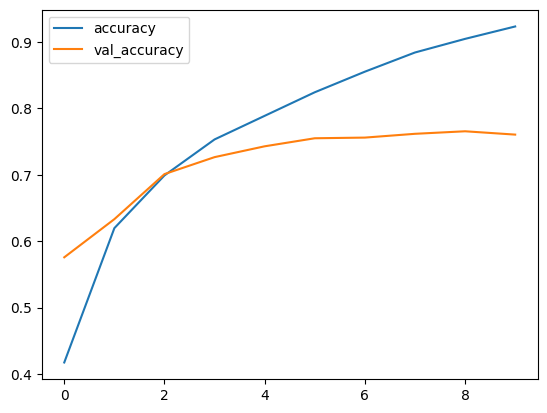

In [ ]:
df_ConvolutionCNN1[['accuracy','val_accuracy']].plot()

<Axes: >

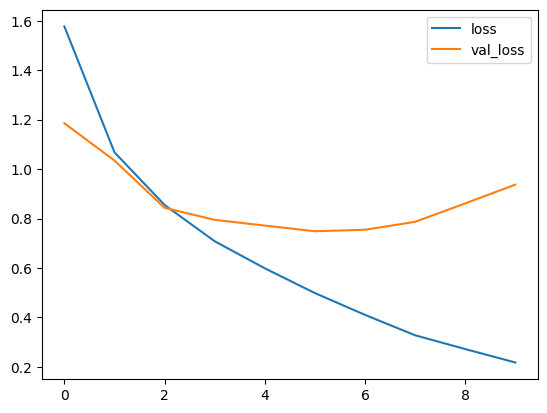

In [ ]:
df_ConvolutionCNN1[['loss','val_loss']].plot()

From the above plots we can say that the model is overfitting.

Let's try to reduce overfitting

1. We can add BatchNormalizaton
2. L1 / L2 regularization


In [ ]:
def secondCNN(input_shape, num_classes):
    model = Sequential()

    # First convolutional layer
    model.add(Conv2D(filters=96, kernel_size=(3, 3), strides=(1, 1), padding='same', input_shape=input_shape,kernel_regularizer=l2(0.01)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(tf.keras.layers.BatchNormalization())

    # Second convolutional layer
    model.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), padding='same',input_shape=input_shape,kernel_regularizer=l2(0.01)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(tf.keras.layers.BatchNormalization())

    # Third convolutional layer
    model.add(Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding='same',input_shape=input_shape,kernel_regularizer=l1(0.01)))
    model.add(Activation('relu'))
    model.add(tf.keras.layers.BatchNormalization())

    # Fourth convolutional layer
    model.add(Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), padding='same',input_shape=input_shape,kernel_regularizer=l1(0.01)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(tf.keras.layers.BatchNormalization())

    # Flatten the output of the fifth convolutional layer
    model.add(Flatten())

    # First fully connected layer
    model.add(Dense(units=4096))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    # Output layer
    model.add(Dense(units=num_classes))
    model.add(Activation('softmax'))

    return model

In [ ]:
# Compile the model
model_convolution2 = secondCNN(input_shape=(32, 32, 3), num_classes=10)
model_convolution2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_secondCNN = model_convolution2.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the model
score = model_convolution2.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score[1])

Epoch 1/10
391/391 [==============================] - 17s 34ms/step - loss: 22.6410 - accuracy: 0.3736 - val_loss: 8.7126 - val_accuracy: 0.1008
Epoch 2/10
391/391 [==============================] - 13s 33ms/step - loss: 6.2326 - accuracy: 0.5034 - val_loss: 5.9346 - val_accuracy: 0.4575
Epoch 3/10
391/391 [==============================] - 13s 34ms/step - loss: 4.4584 - accuracy: 0.5921 - val_loss: 3.9346 - val_accuracy: 0.5675
Epoch 4/10
391/391 [==============================] - 13s 33ms/step - loss: 3.5072 - accuracy: 0.6341 - val_loss: 3.8564 - val_accuracy: 0.5348
Epoch 5/10
391/391 [==============================] - 13s 34ms/step - loss: 3.2474 - accuracy: 0.6623 - val_loss: 3.3687 - val_accuracy: 0.6147
Epoch 6/10
391/391 [==============================] - 13s 34ms/step - loss: 3.1803 - accuracy: 0.6805 - val_loss: 3.4578 - val_accuracy: 0.6169
Epoch 7/10
391/391 [==============================] - 14s 36ms/step - loss: 3.1514 - accuracy: 0.7013 - val_loss: 3.3389 - val_accuracy

With a training accuracy of 74% and test accuracy of 63% we have reduced the overfitting quite a lot, but this was at the expense of less training accuracy.

In [ ]:
df_ConvolutionCNN2 = pd.DataFrame(history_secondCNN.history)

<Axes: >

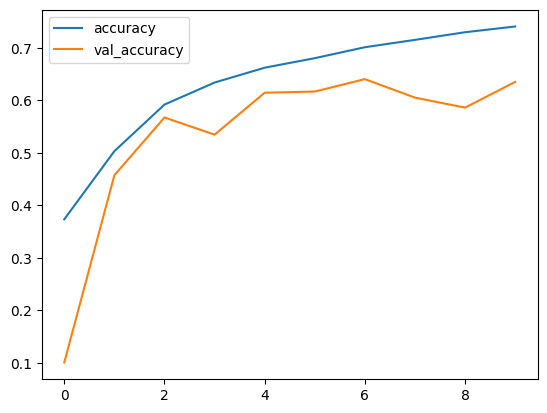

In [ ]:
df_ConvolutionCNN2[['accuracy','val_accuracy']].plot()

<Axes: >

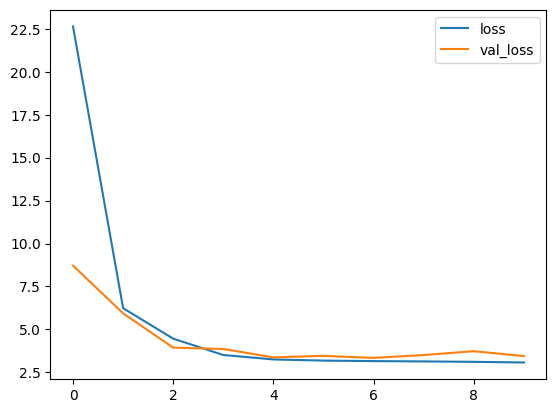

In [ ]:
df_ConvolutionCNN2[['loss','val_loss']].plot()

### CNN model 3

In this model, we have updated the kernel size of layer 2 as 3X3 and also used LeakyRelu activation function instead of relu for all the four convolution layers

In [ ]:
def thirdCNN(input_shape, num_classes):
    model = Sequential()

    # First convolutional layer
    model.add(Conv2D(filters=96, kernel_size=(3, 3), strides=(1, 1), padding='same', input_shape=input_shape,kernel_regularizer=l2(0.01)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(tf.keras.layers.BatchNormalization())

    # Second convolutional layer
    model.add(Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), padding='same',input_shape=input_shape,kernel_regularizer=l2(0.01)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(tf.keras.layers.BatchNormalization())

    # Third convolutional layer
    model.add(Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding='same',input_shape=input_shape,kernel_regularizer=l1(0.01)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(tf.keras.layers.BatchNormalization())

    # Fourth convolutional layer
    model.add(Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), padding='same',input_shape=input_shape,kernel_regularizer=l1(0.01)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(tf.keras.layers.BatchNormalization())

    # Flatten the output of the fifth convolutional layer
    model.add(Flatten())

    # First fully connected layer
    model.add(Dense(units=4096))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    # Output layer
    model.add(Dense(units=num_classes))
    model.add(Activation('softmax'))

    return model

In [ ]:
# Compile the model
model_convolution3 = thirdCNN(input_shape=(32, 32, 3), num_classes=10)
model_convolution3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_thirdCNN = model_convolution3.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the model
score = model_convolution3.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score[1])

Epoch 1/10
391/391 [==============================] - 18s 35ms/step - loss: 22.6884 - accuracy: 0.3704 - val_loss: 12.6745 - val_accuracy: 0.1000
Epoch 2/10
391/391 [==============================] - 14s 35ms/step - loss: 6.9313 - accuracy: 0.4949 - val_loss: 7.4298 - val_accuracy: 0.2668
Epoch 3/10
391/391 [==============================] - 14s 35ms/step - loss: 5.4037 - accuracy: 0.5724 - val_loss: 5.6329 - val_accuracy: 0.4599
Epoch 4/10
391/391 [==============================] - 14s 35ms/step - loss: 4.4852 - accuracy: 0.6170 - val_loss: 4.2126 - val_accuracy: 0.5901
Epoch 5/10
391/391 [==============================] - 13s 34ms/step - loss: 3.6376 - accuracy: 0.6419 - val_loss: 4.3306 - val_accuracy: 0.4519
Epoch 6/10
391/391 [==============================] - 13s 33ms/step - loss: 3.3638 - accuracy: 0.6636 - val_loss: 4.6790 - val_accuracy: 0.4018
Epoch 7/10
391/391 [==============================] - 13s 33ms/step - loss: 3.2373 - accuracy: 0.6858 - val_loss: 3.3641 - val_accurac

Test accuracy: 52.3%
Training accuracy of 73.3%

The testing accuracy dropped!

In [ ]:
df_ConvolutionCNN3 = pd.DataFrame(history_thirdCNN.history)

<Axes: >

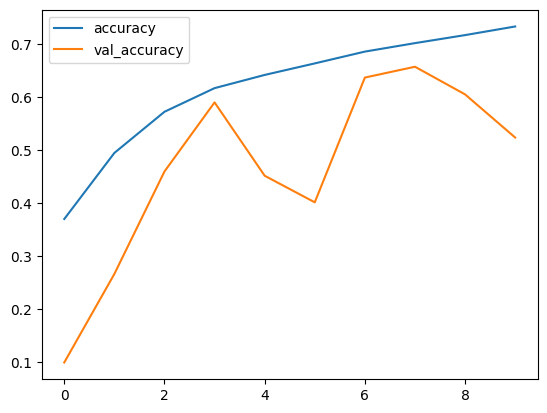

In [ ]:
df_ConvolutionCNN3[['accuracy','val_accuracy']].plot()

<Axes: >

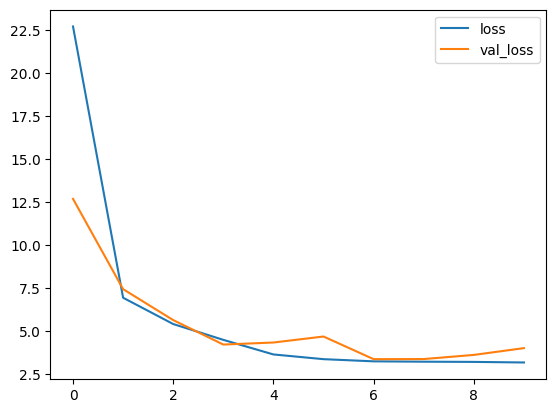

In [ ]:
df_ConvolutionCNN3[['loss','val_loss']].plot()

#### Model 4

We will add additional convolution layers with higher number of filters.
Also added dropout layer in third and fifth activation function with a dropout value of 0.2

In [ ]:
def fourthCNN(input_shape, num_classes):
    model = Sequential()

    # First convolutional layer
    model.add(Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), padding='same', input_shape=input_shape,kernel_regularizer=l2(0.01)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(tf.keras.layers.BatchNormalization())

    # Second convolutional layer
    model.add(Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), padding='same',input_shape=input_shape,kernel_regularizer=l2(0.01)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(tf.keras.layers.BatchNormalization())

    # Third convolutional layer
    model.add(Conv2D(filters=512, kernel_size=(3, 3), strides=(1, 1), padding='same',input_shape=input_shape,kernel_regularizer=l2(0.01)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(Dropout(0.2))

    # Fourth convolutional layer
    model.add(Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), padding='same',input_shape=input_shape,kernel_regularizer=l2(0.01)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(tf.keras.layers.BatchNormalization())

    # Fifth convolutional layer
    model.add(Conv2D(filters=512, kernel_size=(3, 3), strides=(1, 1), padding='same',input_shape=input_shape,kernel_regularizer=l1(0.01)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(Dropout(0.2))

    # Flatten the output of the fifth convolutional layer
    model.add(Flatten())

    # First fully connected layer
    model.add(Dense(units=4096))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))

    # Output layer
    model.add(Dense(units=num_classes))
    model.add(Activation('softmax'))

    return model

In [ ]:
# Compile the model
model_convolution4 = fourthCNN(input_shape=(32, 32, 3), num_classes=10)
model_convolution4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_fourthCNN = model_convolution4.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the model
score = model_convolution4.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score[1])

Epoch 1/10
391/391 [==============================] - 27s 51ms/step - loss: 15.6977 - accuracy: 0.4330 - val_loss: 10.7928 - val_accuracy: 0.1000
Epoch 2/10
391/391 [==============================] - 18s 47ms/step - loss: 5.9318 - accuracy: 0.5433 - val_loss: 7.6404 - val_accuracy: 0.3825
Epoch 3/10
391/391 [==============================] - 18s 46ms/step - loss: 5.9432 - accuracy: 0.5880 - val_loss: 5.3139 - val_accuracy: 0.5417
Epoch 4/10
391/391 [==============================] - 18s 47ms/step - loss: 4.9400 - accuracy: 0.6154 - val_loss: 5.3763 - val_accuracy: 0.3848
Epoch 5/10
391/391 [==============================] - 18s 47ms/step - loss: 4.3369 - accuracy: 0.6344 - val_loss: 5.3137 - val_accuracy: 0.3575
Epoch 6/10
391/391 [==============================] - 19s 50ms/step - loss: 3.9825 - accuracy: 0.6531 - val_loss: 4.2022 - val_accuracy: 0.5394
Epoch 7/10
391/391 [==============================] - 19s 48ms/step - loss: 3.7278 - accuracy: 0.6698 - val_loss: 3.9861 - val_accurac

Training accuracy: 70.76%
Test accuracy: 58.8%

In [ ]:
df_ConvolutionCNN4 = pd.DataFrame(history_fourthCNN.history)

<Axes: >

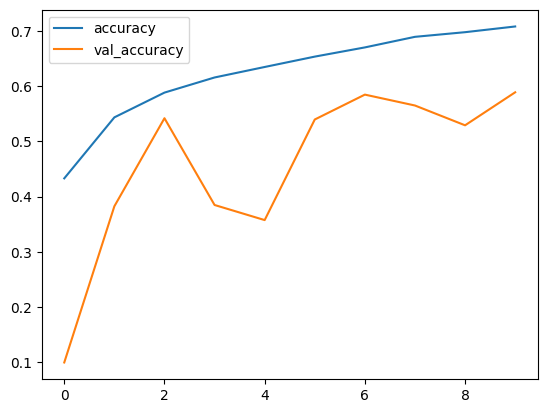

In [ ]:
df_ConvolutionCNN4[['accuracy','val_accuracy']].plot()

<Axes: >

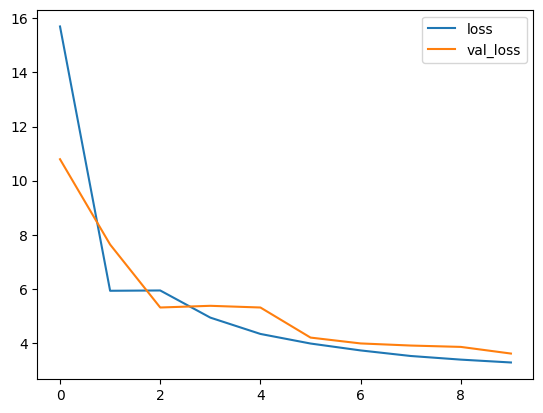

In [ ]:
df_ConvolutionCNN4[['loss','val_loss']].plot()

#### Model 5

In this model, we'll change the architecture of the whole CNN models used before. Here we will use two {convolution layer, batchNormalization layer} before one pooling layer in the first and second layer. Only one pair of {convolution layer, batchNormalization layer} for third layer.

In [ ]:
def fifthCNN(input_shape, num_classes):

  # First Convolution Layer
  model = Sequential()
  model.add(Conv2D(32, (3, 3), padding='same',
                  input_shape=x_train.shape[1:]))
  model.add(Activation('relu'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(Conv2D(32, (3, 3)))
  model.add(Activation('relu'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.20))

  #Second Colvolution Layer
  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(Conv2D(64, (3, 3)))
  model.add(Activation('relu'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.20))

  #Third Convolution layer
  model.add(Conv2D(128, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.20))

  model.add(Flatten())
  model.add(Dense(512,kernel_regularizer=l2(0.01)))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))

  return model

In [ ]:
# Compile the model
model_convolution5 = fifthCNN(input_shape=(32, 32, 3), num_classes=10)
model_convolution5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_fifthCNN = model_convolution5.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the model
score = model_convolution5.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score[1])

Epoch 1/10
391/391 [==============================] - 15s 22ms/step - loss: 3.2770 - accuracy: 0.4681 - val_loss: 2.5551 - val_accuracy: 0.3252
Epoch 2/10
391/391 [==============================] - 8s 20ms/step - loss: 1.2525 - accuracy: 0.6276 - val_loss: 1.2627 - val_accuracy: 0.6050
Epoch 3/10
391/391 [==============================] - 9s 24ms/step - loss: 1.0351 - accuracy: 0.6925 - val_loss: 0.9849 - val_accuracy: 0.7136
Epoch 4/10
391/391 [==============================] - 9s 22ms/step - loss: 0.9240 - accuracy: 0.7336 - val_loss: 1.0418 - val_accuracy: 0.6930
Epoch 5/10
391/391 [==============================] - 8s 22ms/step - loss: 0.8536 - accuracy: 0.7630 - val_loss: 0.9679 - val_accuracy: 0.7298
Epoch 6/10
391/391 [==============================] - 9s 23ms/step - loss: 0.7963 - accuracy: 0.7843 - val_loss: 0.9188 - val_accuracy: 0.7424
Epoch 7/10
391/391 [==============================] - 8s 20ms/step - loss: 0.7597 - accuracy: 0.7988 - val_loss: 0.8096 - val_accuracy: 0.780

Training accuracy: 83.2%

Testing accuracy: 77.4%

<Axes: >

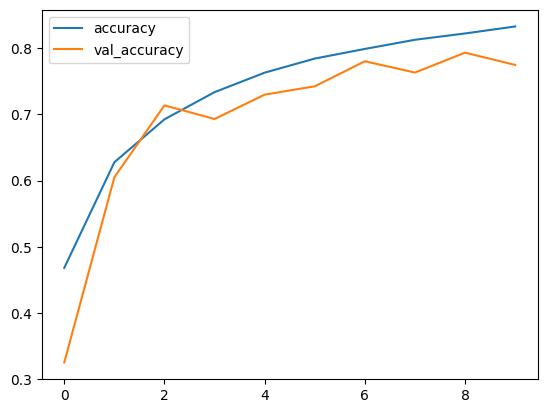

In [ ]:
df_ConvolutionCNN5 = pd.DataFrame(history_fifthCNN.history)
df_ConvolutionCNN5[['accuracy','val_accuracy']].plot()

<Axes: >

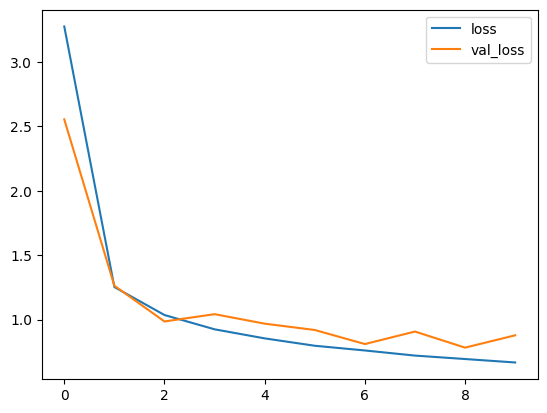

In [ ]:
df_ConvolutionCNN5[['loss','val_loss']].plot()

#### Model 6

Here we will use 2 pairs of {convolution layer, batchNormalization layer} in the third layer as well. 

From the graphs of model 5, we can see that this model works well. So for model 6, total number of epochs = 50.

In [ ]:
def sixthCNN(input_shape, num_classes):

  # First Convolution Layer
  model = Sequential()
  model.add(Conv2D(32, (3, 3), padding='same',
                  input_shape=x_train.shape[1:]))
  model.add(Activation('relu'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(Conv2D(32, (3, 3)))
  model.add(Activation('relu'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.20))

  #Second Colvolution Layer
  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(Conv2D(64, (3, 3)))
  model.add(Activation('relu'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.20))

  #Third Convolution layer
  model.add(Conv2D(128, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(Conv2D(128, (3, 3)))
  model.add(Activation('relu'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.20))

  #First Fully Connected layer
  model.add(Flatten())
  model.add(Dense(512,kernel_regularizer=l2(0.01)))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))

  return model

In [ ]:
# Compile the model
model_convolution6 = sixthCNN(input_shape=(32, 32, 3), num_classes=10)
model_convolution6.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_sixthCNN = model_convolution6.fit(x_train, y_train, epochs=50, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the model
score = model_convolution6.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score[1])

Epoch 1/50
391/391 [==============================] - 13s 22ms/step - loss: 3.3493 - accuracy: 0.4483 - val_loss: 2.8244 - val_accuracy: 0.2488
Epoch 2/50
391/391 [==============================] - 8s 20ms/step - loss: 1.2629 - accuracy: 0.6272 - val_loss: 1.2174 - val_accuracy: 0.6274
Epoch 3/50
391/391 [==============================] - 7s 19ms/step - loss: 1.0280 - accuracy: 0.6918 - val_loss: 1.1232 - val_accuracy: 0.6634
Epoch 4/50
391/391 [==============================] - 8s 20ms/step - loss: 0.9165 - accuracy: 0.7344 - val_loss: 1.2983 - val_accuracy: 0.6283
Epoch 5/50
391/391 [==============================] - 7s 19ms/step - loss: 0.8408 - accuracy: 0.7643 - val_loss: 0.8312 - val_accuracy: 0.7715
Epoch 6/50
391/391 [==============================] - 8s 20ms/step - loss: 0.7988 - accuracy: 0.7800 - val_loss: 0.9171 - val_accuracy: 0.7455
Epoch 7/50
391/391 [==============================] - 8s 20ms/step - loss: 0.7529 - accuracy: 0.7976 - val_loss: 0.8098 - val_accuracy: 0.782

Training accuracy: 94%

Test Accuracy: 84.4%

<Axes: >

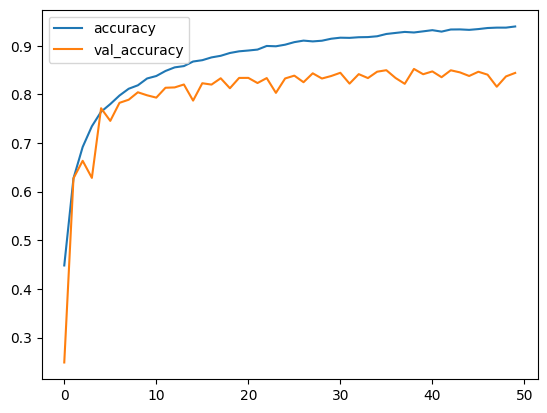

In [ ]:
df_ConvolutionCNN6 = pd.DataFrame(history_sixthCNN.history)
df_ConvolutionCNN6[['accuracy','val_accuracy']].plot()

<Axes: >

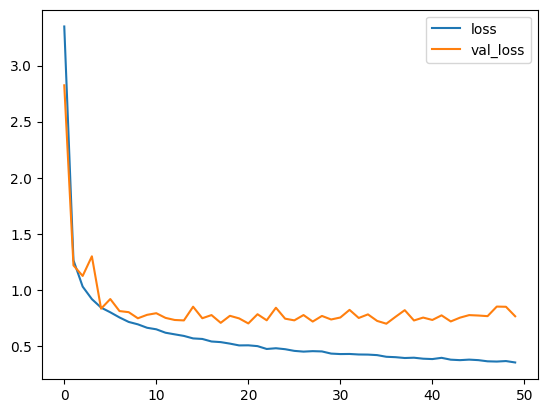

In [ ]:
df_ConvolutionCNN6[['loss','val_loss']].plot()

Model 6 performed really well. With less difference between training and testing accuracy, the model has fitted well.

#### Model 7

For model 7, let's try to increase the filter size for each convolution layer and see how it performs. Our expected target is to increase the training accuracy by also increasing the testing accuracy.

In [ ]:
def sevenCNN(input_shape, num_classes):

  # First Convolution Layer
  model = Sequential()
  model.add(Conv2D(64, (3, 3), padding='same',
                  input_shape=x_train.shape[1:]))
  model.add(Activation('relu'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(Conv2D(32, (3, 3)))
  model.add(Activation('relu'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.20))

  #Second Colvolution Layer
  model.add(Conv2D(128, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(Conv2D(64, (3, 3)))
  model.add(Activation('relu'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.20))

  #Third Convolution layer
  model.add(Conv2D(256, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(Conv2D(128, (3, 3)))
  model.add(Activation('relu'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.20))

  #First Fully Connected layer
  model.add(Flatten())
  model.add(Dense(512,kernel_regularizer=l2(0.01)))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))

  return model

In [ ]:
# Compile the model
model_convolution7 = sevenCNN(input_shape=(32, 32, 3), num_classes=10)
model_convolution7.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_sevenCNN = model_convolution7.fit(x_train, y_train, epochs=50, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the model
score = model_convolution7.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score[1])

Epoch 1/50
391/391 [==============================] - 20s 34ms/step - loss: 3.2707 - accuracy: 0.4636 - val_loss: 2.7512 - val_accuracy: 0.2426
Epoch 2/50
391/391 [==============================] - 12s 30ms/step - loss: 1.2010 - accuracy: 0.6466 - val_loss: 1.0626 - val_accuracy: 0.6855
Epoch 3/50
391/391 [==============================] - 12s 30ms/step - loss: 0.9588 - accuracy: 0.7207 - val_loss: 0.9867 - val_accuracy: 0.7117
Epoch 4/50
391/391 [==============================] - 12s 31ms/step - loss: 0.8569 - accuracy: 0.7584 - val_loss: 0.9676 - val_accuracy: 0.7270
Epoch 5/50
391/391 [==============================] - 12s 30ms/step - loss: 0.7910 - accuracy: 0.7836 - val_loss: 0.9485 - val_accuracy: 0.7388
Epoch 6/50
391/391 [==============================] - 12s 31ms/step - loss: 0.7277 - accuracy: 0.8066 - val_loss: 0.8582 - val_accuracy: 0.7696
Epoch 7/50
391/391 [==============================] - 13s 34ms/step - loss: 0.6873 - accuracy: 0.8200 - val_loss: 1.0214 - val_accuracy:

Training Accuracy: 96.14%

Testing Accuracy: 85.29%

<Axes: >

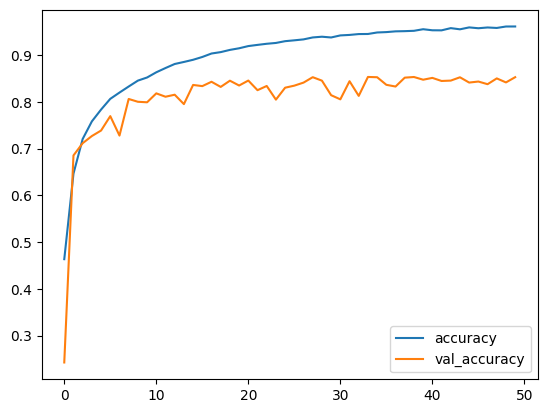

In [ ]:
df_ConvolutionCNN7 = pd.DataFrame(history_sevenCNN.history)
df_ConvolutionCNN7[['accuracy','val_accuracy']].plot()

<Axes: >

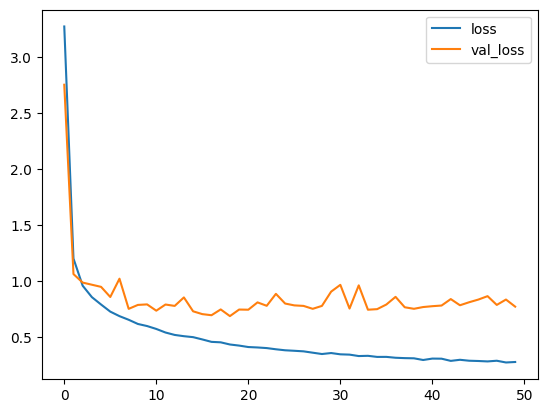

In [ ]:
df_ConvolutionCNN7[['loss','val_loss']].plot()

Now that we have final models from both methods, let's predict some images.

#### Prediction from CNN model.

In [ ]:
X_new = x_test[:3]
y_new = y_test[:3]
y_proba = model_convolution7.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 2s 2s/step


array([[0.  , 0.  , 0.  , 0.9 , 0.  , 0.  , 0.09, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  ]],
      dtype=float32)

In [ ]:
y_pred = np.argmax(y_proba, axis=-1)
y_pred, y_new

(array([3, 8, 8]),
 array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32))

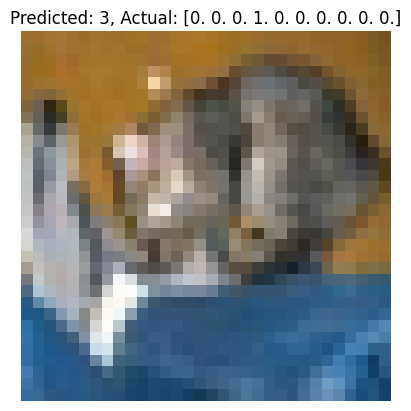

------------------------------------------------------------


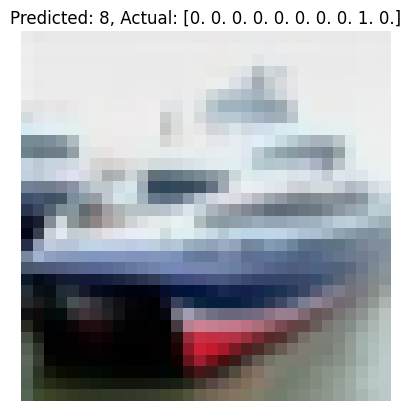

------------------------------------------------------------


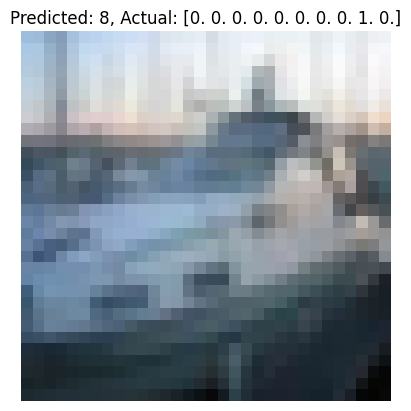

------------------------------------------------------------


In [ ]:
for data, pred, actual in zip(X_new, y_pred, y_new):
  plt.imshow(data, cmap="binary")
  plt.title(f"Predicted: {pred}, Actual: {actual}")
  plt.axis("off")
  plt.show()
  print("---"*20)

#### Prediction from DNN W/O Convolution layer model 